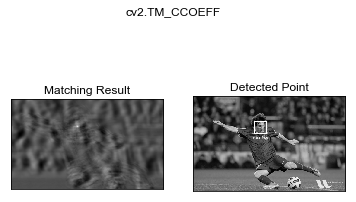

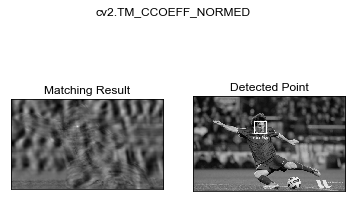

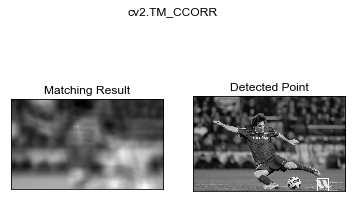

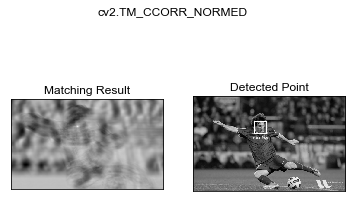

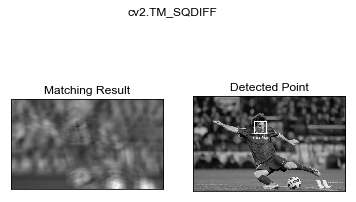

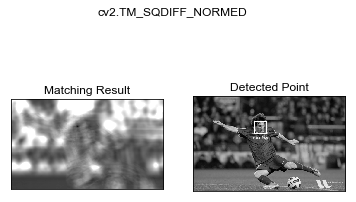

In [11]:
'''
模板匹配是用来在一副大图中搜寻查找模版图像位置的方法。
OpenCV 为 我们提供了函数:cv2.matchTemplate()。
和 2D 卷积一样，它也是用模 板图像在输入图像(大图)上滑动，并在每一个位置对模板图像和与其对应的 输入图像的子区域进行比较。
OpenCV 提供了几种不同的比较方法(细节请看 文档)。返回的结果是一个灰度图像，每一个像素值表示了此区域与模板的匹配程度。
如果输入图像的大小是(WxH)，模板的大小是(wxh)，输出的结果 的大小就是(W-w+1，H-h+1)。
当你得到这幅图之后，就可以使用函数 cv2.minMaxLoc() 来找到其中的最小值和最大值的位置了。
第一个值为矩 形左上角的点(位置)，(w，h)为 moban 模板矩形的宽和高。这个矩形就是 找到的模板区域了。
'''

import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('/Users/ylshan/Documents/python/视觉/opencv/data/messi5.jpg',0)
img2 = img.copy()
template = cv2.imread('/Users/ylshan/Documents/python/视觉/opencv/data/messi_face.jpg',0)
w, h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods: 
    img = img2.copy()
#exec 语句用来执行储存在字符串或文件中的 Python 语句。
# 例如，我们可以在运行时生成一个包含 Python 代码的字符串，然后使用 exec 语句执行这些语句。 
#eval 语句用来计算存储在字符串中的有效 Python 表达式
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res) # 使用不同的比较方法，对结果的解释不同
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]: 
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

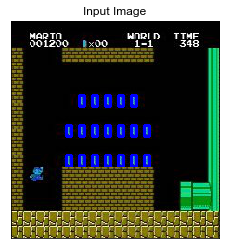

In [10]:
'''
在前面的部分，我们在图片中搜素梅西的脸，而且梅西只在图片中出 现了一次。
假如你的目标对象只在图像中出现了很多次怎么办呢?函数 cv.imMaxLoc() 只会给出最大值和最小值。
此时，我们就要使用阈值了。 
在下面的例子中我们要经典游戏 Mario 的一张截屏图片中找到其中的硬币。
'''

import cv2
import numpy as np
from matplotlib import pyplot as plt
img_rgb = cv2.imread('/Users/ylshan/Documents/python/视觉/opencv/data/mario.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('/Users/ylshan/Documents/python/视觉/opencv/data/mario_coin.jpg',0)
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
#阈值
threshold = 0.5
#umpy.where(condition[, x, y])
#Return elements, either from x or y, depending on condition. 
#If only condition is given, return condition.nonzero().
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

plt.imshow(img_rgb)
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.show()